In [78]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [97]:
feature_table = pd.read_csv('Iris.csv')
feature_table = feature_table.sample(frac = 1, random_state = 42).reset_index(drop = True)
feature_table.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,74,6.1,2.8,4.7,1.2,Iris-versicolor
1,19,5.7,3.8,1.7,0.3,Iris-setosa
2,119,7.7,2.6,6.9,2.3,Iris-virginica
3,79,6.0,2.9,4.5,1.5,Iris-versicolor
4,77,6.8,2.8,4.8,1.4,Iris-versicolor


In [80]:
data_len = len(feature_table)
print('length of data:', data_len)


length of data: 150


In [81]:
# Splitting Data to Test Train
eighty = int(data_len * 0.8)
twenty = int(data_len * 0.2)

train_data1 = feature_table[:eighty]
test_data1 = feature_table[eighty:]
print('Train data:', train_data1)
print('Test data:', test_data1)

train_data2 = feature_table[:twenty+twenty+twenty-1]
test_data2 = feature_table[eighty-twenty:eighty-1]
train_data2 = pd.concat([train_data2, feature_table[eighty:]])

train_data3 = feature_table[:twenty+twenty-1]
test_data3 = feature_table[twenty+twenty:eighty-twenty-1]
train_data3 = pd.concat([train_data3, feature_table[eighty-twenty:]])

train_data4 = feature_table[:twenty-1]
test_data4 = feature_table[twenty:eighty-twenty-twenty-1]
train_data4 = pd.concat([train_data4, feature_table[eighty-twenty-twenty:]])

train_data5 = feature_table[twenty:]
test_data5 = feature_table[:twenty-1]



Train data:       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0     74            6.1           2.8            4.7           1.2   
1     19            5.7           3.8            1.7           0.3   
2    119            7.7           2.6            6.9           2.3   
3     79            6.0           2.9            4.5           1.5   
4     77            6.8           2.8            4.8           1.4   
..   ...            ...           ...            ...           ...   
115  140            6.9           3.1            5.4           2.1   
116   62            5.9           3.0            4.2           1.5   
117  148            6.5           3.0            5.2           2.0   
118   80            5.7           2.6            3.5           1.0   
119   60            5.2           2.7            3.9           1.4   

             Species  
0    Iris-versicolor  
1        Iris-setosa  
2     Iris-virginica  
3    Iris-versicolor  
4    Iris-versicolor  
..       

In [98]:
def euclidean_distance(point1, point2):
    # Only use features, no label
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.sqrt(np.sum((point1 - point2) ** 2))




def find_neighbours(train_data, test_data, k=3):
    predictions = []

    for i in range(len(test_data)):
        distances = []

        for j in range(len(train_data)):
            # Compute distance between test sample and training sample
            distance = euclidean_distance(test_data.iloc[i, :-1], train_data.iloc[j, :-1])
            label = train_data.iloc[j, -1]  # Get label from training data
            distances.append((distance, label))

        # Sort based on distance
        distances.sort(key=lambda x: x[0])

        # Take top k neighbours
        neighbours = distances[:k]
        neighbour_labels = [label for _, second in neighbours]

        # Majority voting
        predicted_label = max(set(neighbour_labels), key=neighbour_labels.count)
        # print('predicted label:', neighbours)
        predictions.append(predicted_label)

    return predictions




In [139]:

prediction = find_neighbours(train_data1, test_data1)
prediction2 = find_neighbours(train_data2, test_data2, 7)
prediction3 = find_neighbours(train_data1, test_data1, 10)
print('prediction:', prediction)



prediction: ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']


In [116]:
def confusion_matrix(predictions, test_data):
    labels = test_data.iloc[:, -1].values
    unique_labels = np.unique(labels)
    matrix = pd.DataFrame(0, index=unique_labels, columns=unique_labels)

    for i in range(len(predictions)):
        matrix.loc[labels[i], predictions[i]] += 1

    return matrix

In [143]:
matrix = confusion_matrix(prediction, test_data1)
matrix2 = confusion_matrix(prediction2, test_data2 )
matrix3 = confusion_matrix(prediction3, test_data1)
print('Confusion Matrix:', matrix)

Confusion Matrix:                  Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                0                7               0
Iris-versicolor            0               11               0
Iris-virginica             0               12               0


In [118]:
def plot_confusion_matrix(matrix, title='Confusion matrix'):
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(matrix.columns))
    plt.xticks(tick_marks, matrix.columns, rotation=45)
    plt.yticks(tick_marks, matrix.index)

    thresh = matrix.values.max() / 2.
    for i, j in np.ndindex(matrix.shape):
        plt.text(j, i, matrix.values[i, j],
                 horizontalalignment="center",
                 color="white" if matrix.values[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

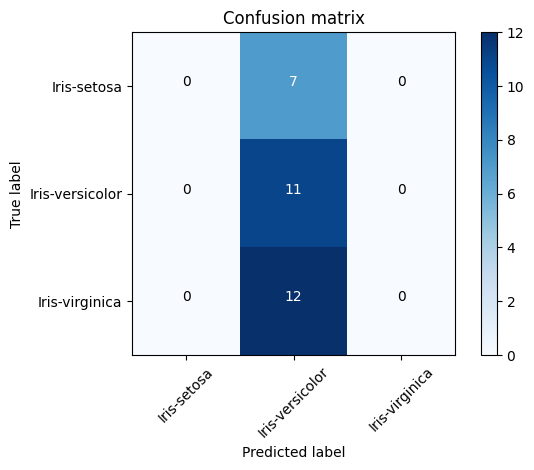

In [144]:
plot_confusion_matrix(matrix)


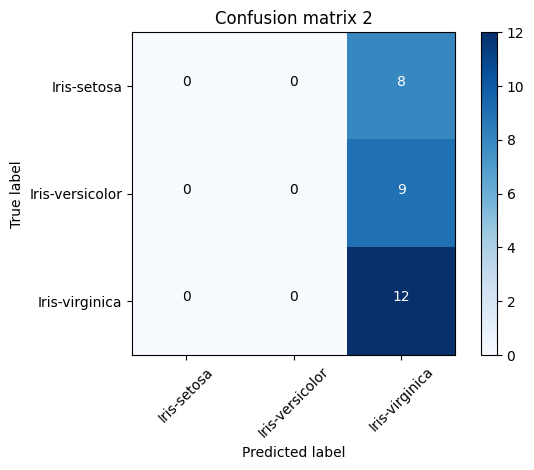

In [145]:
plot_confusion_matrix(matrix2, title='Confusion matrix 2')

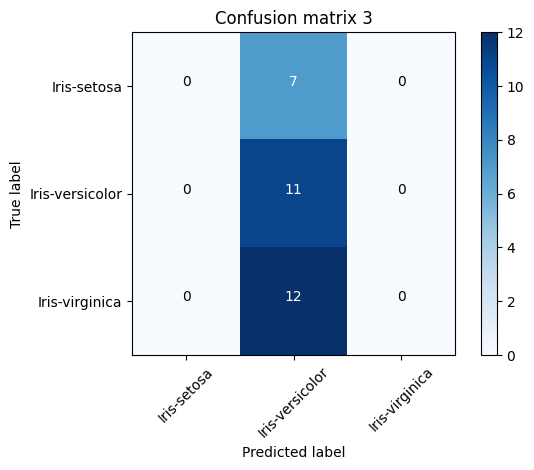

In [146]:
plot_confusion_matrix(matrix3, title='Confusion matrix 3')


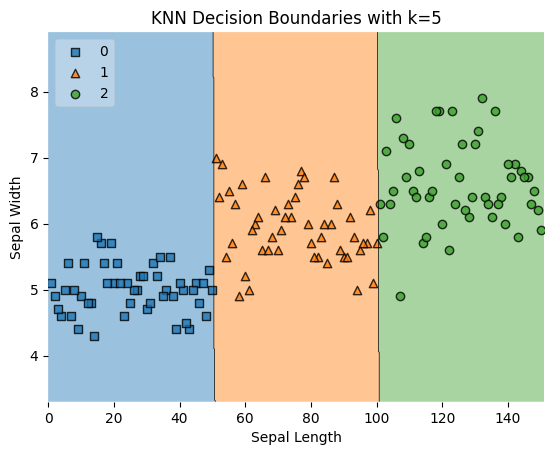

In [138]:
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Only use two features for plotting
X = feature_table.iloc[:, [0, 1]].values
y = feature_table.iloc[:, -1].values

# Encode string labels into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Plot decision regions
plot_decision_regions(X, y, clf=knn, legend=2)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Decision Boundaries with k=5')
plt.show()


In [187]:
# Minimum Distance Classifier
input_data = pd.read_csv("Iris.csv")
input_data = input_data.sample(frac=1, random_state=42).reset_index(drop=True)
labels = input_data.iloc[:, -1].values
labels = np.unique(labels)
def distance_classifier(train_data, test_data, k):
    predictions = []
    for i in range (len(test_data)):
        distances = []
        for j in range(len(train_data)):
            distance = euclidean_distance(test_data.iloc[i,:-1], train_data.iloc[j, :-1])
            label = train_data.iloc[j, -1]
            distances.append((distance, label))
        distances.sort(key=lambda x: x[0])
        distances = distances[:k]
        neighbour_labels = [label for label, label in distances]
        print(neighbour_labels)
        predicted_label = max(neighbour_labels)
        predictions.append(predicted_label)
    return predictions

def confusion_matrix(train_data, test_data, k):
    predictions = distance_classifier(train_data, test_data, k)
    labels = test_data.iloc[:, -1].values
    labels = np.unique(labels)
    matrix = pd.DataFrame(0, index=labels, columns=labels)
    for i in range(len(predictions)):
        if predictions[i] == test_data.iloc[i, -1]:
            matrix.loc[test_data.iloc[i,-1], predictions[i]] += 1
    return matrix


In [200]:
print('Minimum Distance Classifier', distance_classifier(train_data1, test_data1, 3))
matrix = confusion_matrix(train_data1, test_data1, 3)
print('Confusion Matrix:', matrix)

['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']
['Iris-setosa', 'Iris-setosa', 'Iris-setosa']
['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']
['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']
['Iris-setosa', 'Iris-setosa', 'Iris-setosa']
['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']
['Iris-virginica', 'Iris-virginica', 'Iris-virginica']
['Iris-virginica', 'Iris-virginica', 'Iris-virginica']
['Iris-setosa', 'Iris-setosa', 'Iris-setosa']
['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']
['Iris-virginica', 'Iris-virginica', 'Iris-virginica']
['Iris-virginica', 'Iris-virginica', 'Iris-virginica']
['Iris-setosa', 'Iris-setosa', 'Iris-setosa']
['Iris-virginica', 'Iris-virginica', 'Iris-virginica']
['Iris-setosa', 'Iris-setosa', 'Iris-setosa']
['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']
['Iris-virginica', 'Iris-virginica', 'Iris-virginica']
['Iris-virginica', 'Iris-virginica', 'Iris-virginica']
['Iris-versicolor', 'Iris-versicolor'

In [201]:
def precision(confusion_matrix):
    TP = confusion_matrix.values.diagonal().sum()
    FP = confusion_matrix.sum(axis=0) - confusion_matrix.values.diagonal()
    precision = TP / (TP + FP)
    accuracy = confusion_matrix.values.diagonal().sum() / confusion_matrix.sum().sum()
    return precision , accuracy


In [202]:
precision, accuracy = precision(matrix)
print('precision: ', precision)
print('accuracy: ', accuracy)


precision:  Iris-setosa        1.0
Iris-versicolor    1.0
Iris-virginica     1.0
dtype: float64
accuracy:  1.0
